<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 10 – Thresholding, Segmentasi Sederhana**

**Global Threshold**

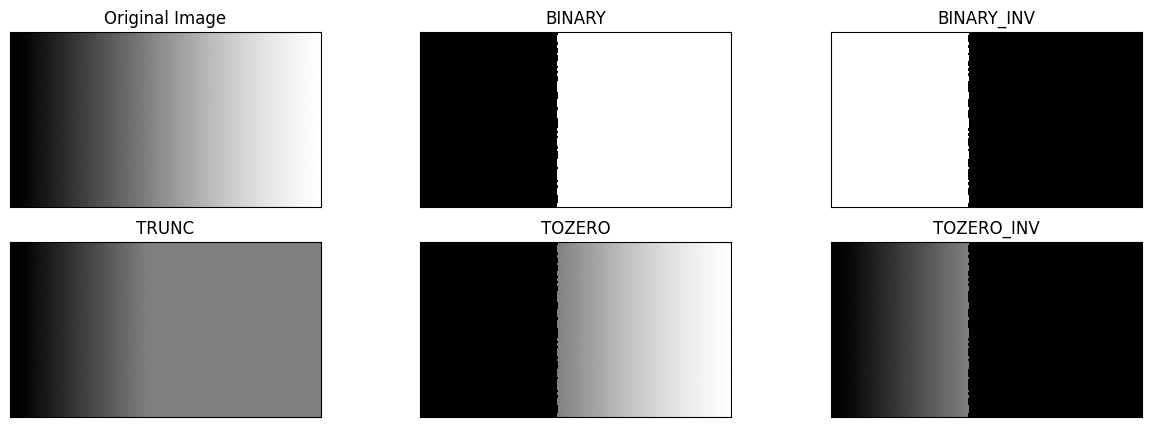

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)

thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Adaptive Threshold**

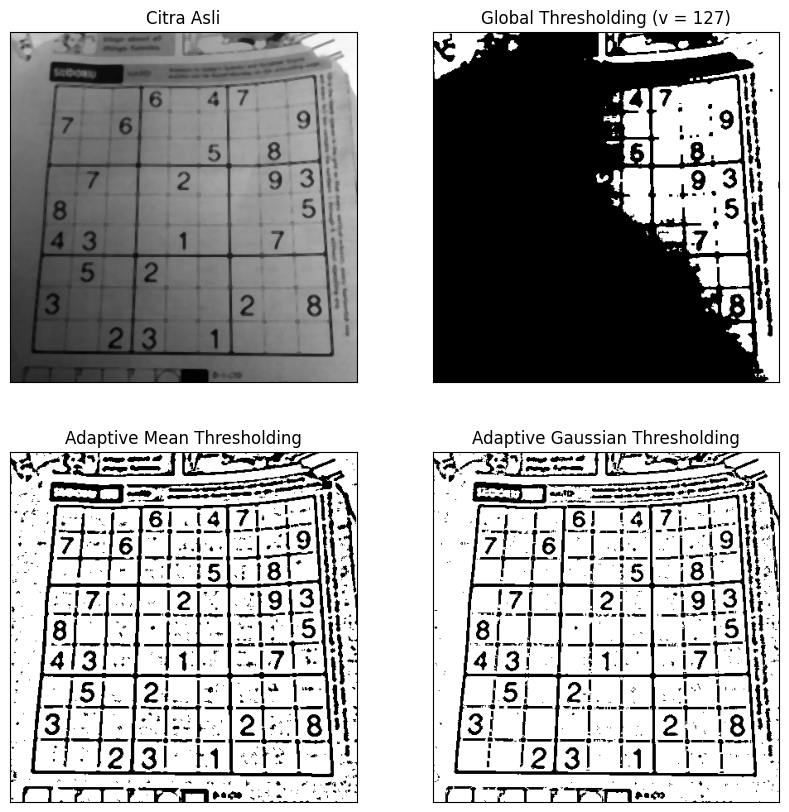

In [8]:
filename = ('/content/drive/MyDrive/PCVK/Images/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Otsu’s Threshold**

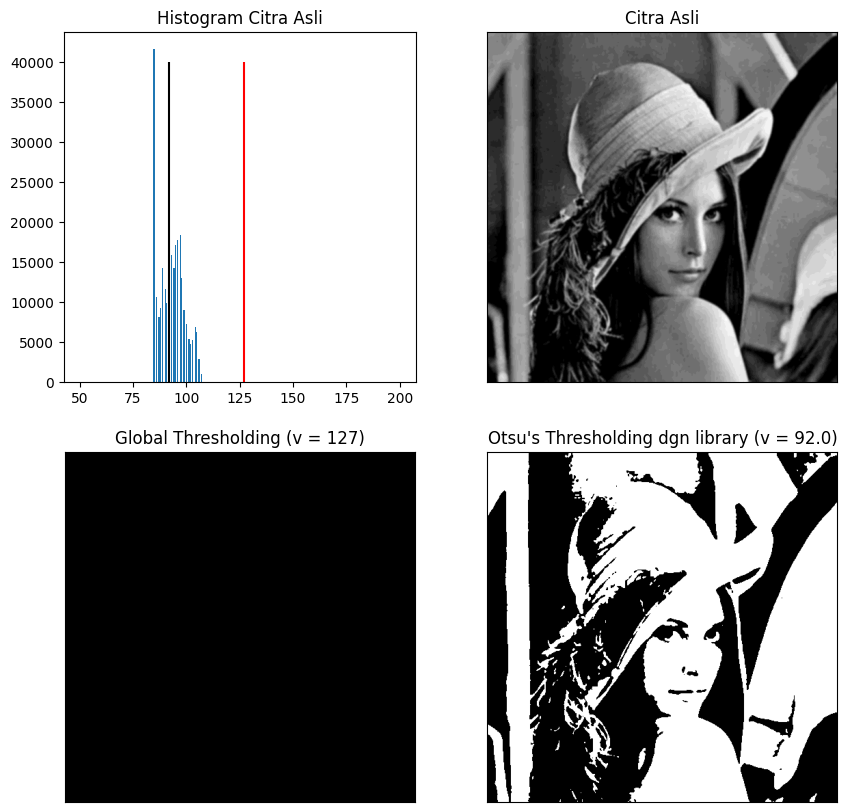

In [11]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Code berikut akan menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan
menggunakan Gaussian Filter.

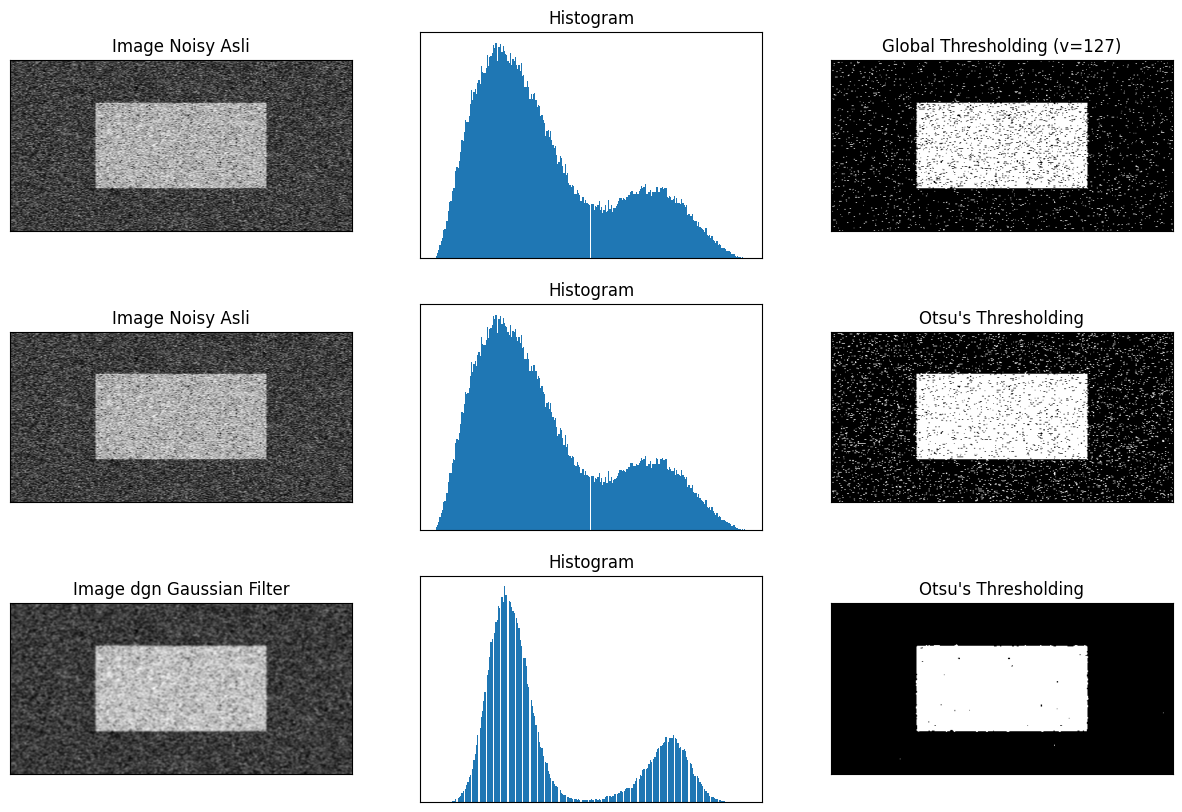

In [12]:
filename = ('/content/drive/MyDrive/PCVK/Images/noisy2.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

**Sementasi Citra menggunakan K-Means**

K-Means merupakan metode Clustering yang biasa digunakan untuk melakukan segmentasi citra
dengan penentuan jumlah cluster sesuai dengan yang kita harapkan

(<Axes: >, <matplotlib.image.AxesImage at 0x7a541cb1f760>)

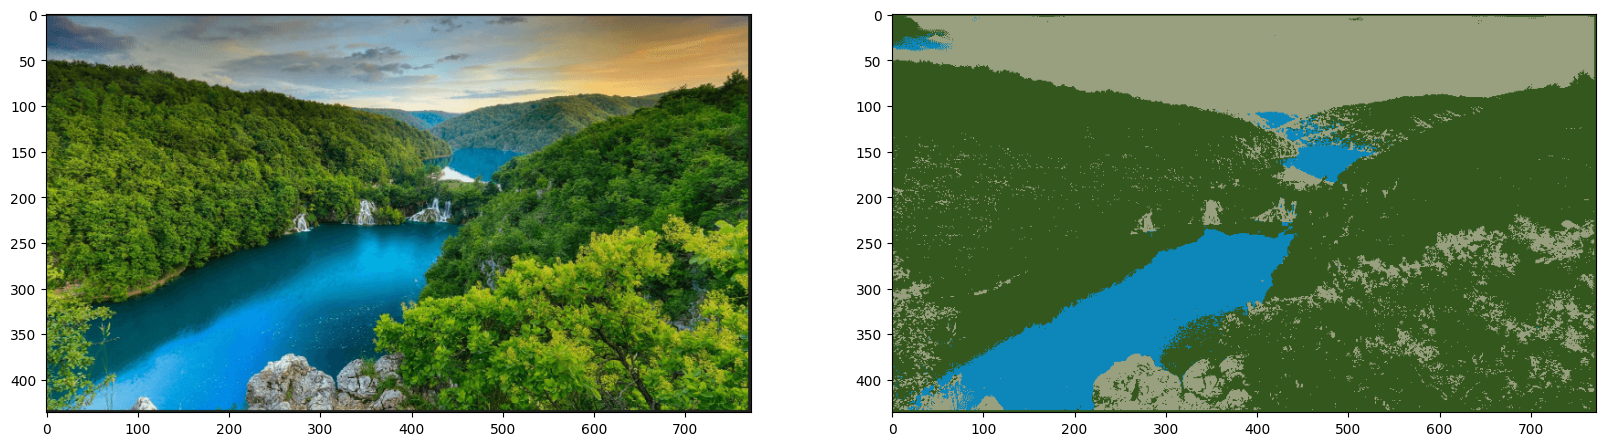

In [15]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/Images/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

Code berikut merupakan lanjutan dari code diatas yang digunakan untuk mengubah warna pada
cluster tertentu.

(<Axes: >, <matplotlib.image.AxesImage at 0x7a541d06dde0>)

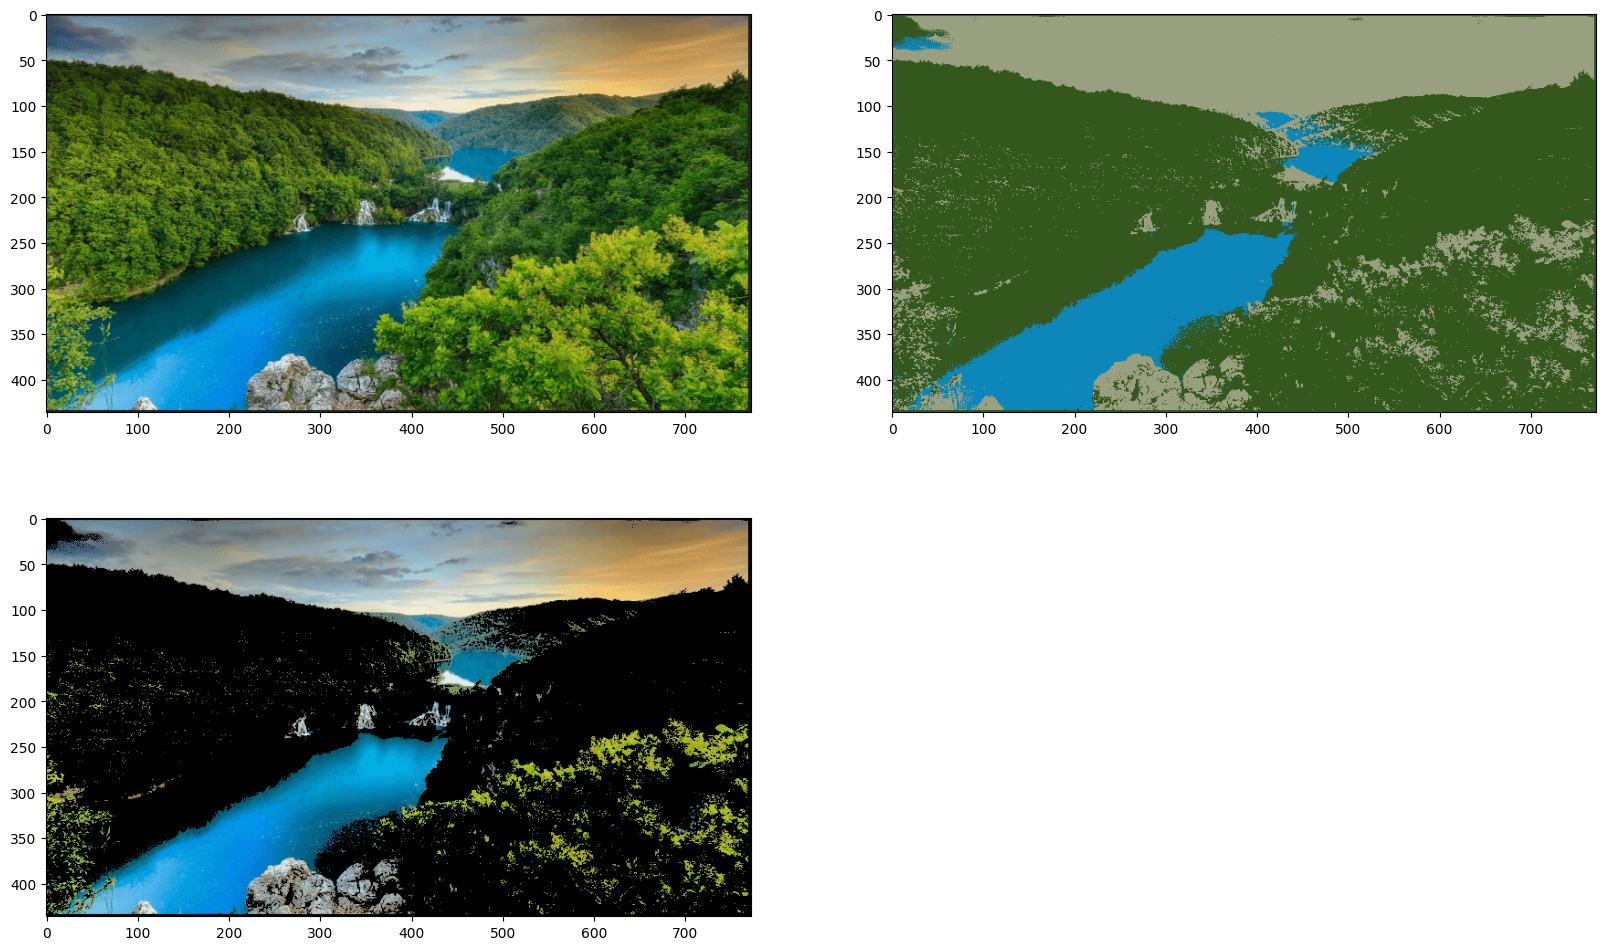

In [16]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)

# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))

# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]

# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

**Tugas Praktikum**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

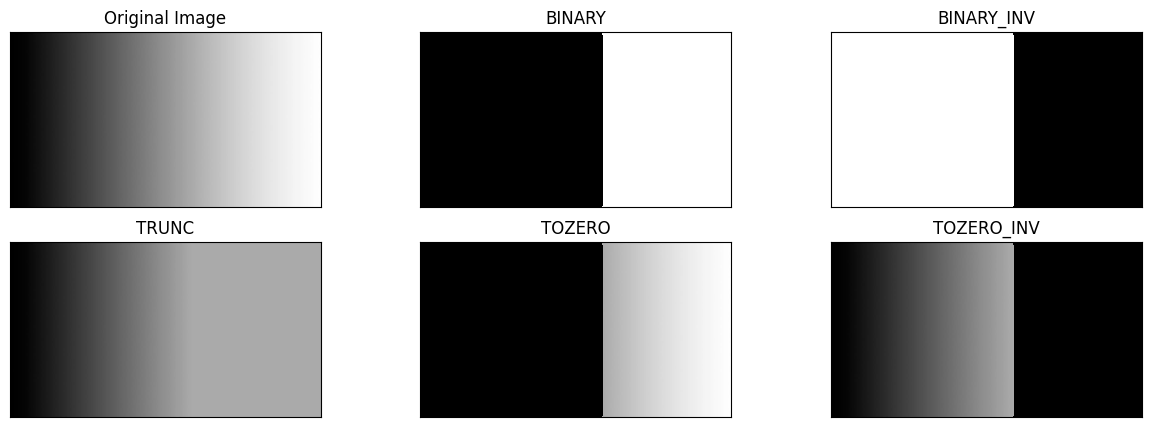

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)

thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

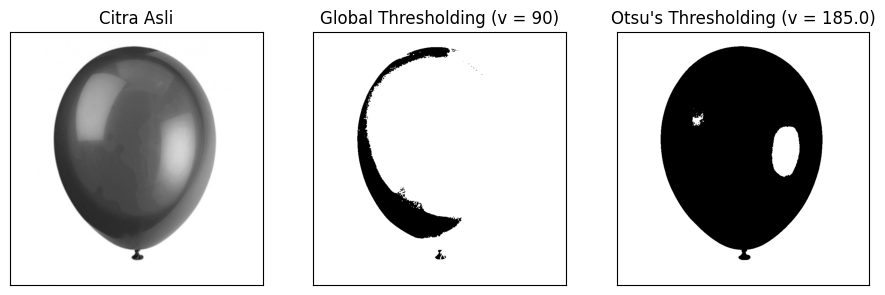

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/balloon.jpg')
img = cv.imread(filename, 0)  # Membaca gambar dalam skala abu-abu
blur = cv.GaussianBlur(img, (5, 5), 0)  # Mengaburkan gambar dengan Gaussian Blur
thresh = 90  # Threshold global

# Thresholding global
ret, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)

# Thresholding Otsu
ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Set judul dan gambar yang akan ditampilkan
x = "Otsu's Thresholding (v = " + str(ret2) + ")"
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

# Membuat figure dan subplot untuk menampilkan citra
plt.figure(figsize=(15, 5))

# Menampilkan citra asli, global thresholding, dan Otsu's thresholding
for i in range(len(citra3)):
    plt.subplot(1, 4, i + 2)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:



1.   anda dapat gunakan cv.calcHist untuk menampilkan histogram.
2.   Buka link berikut https://opencvtutorial.
readthedocs.io/en/latest/histogram/histogram.html.
3. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

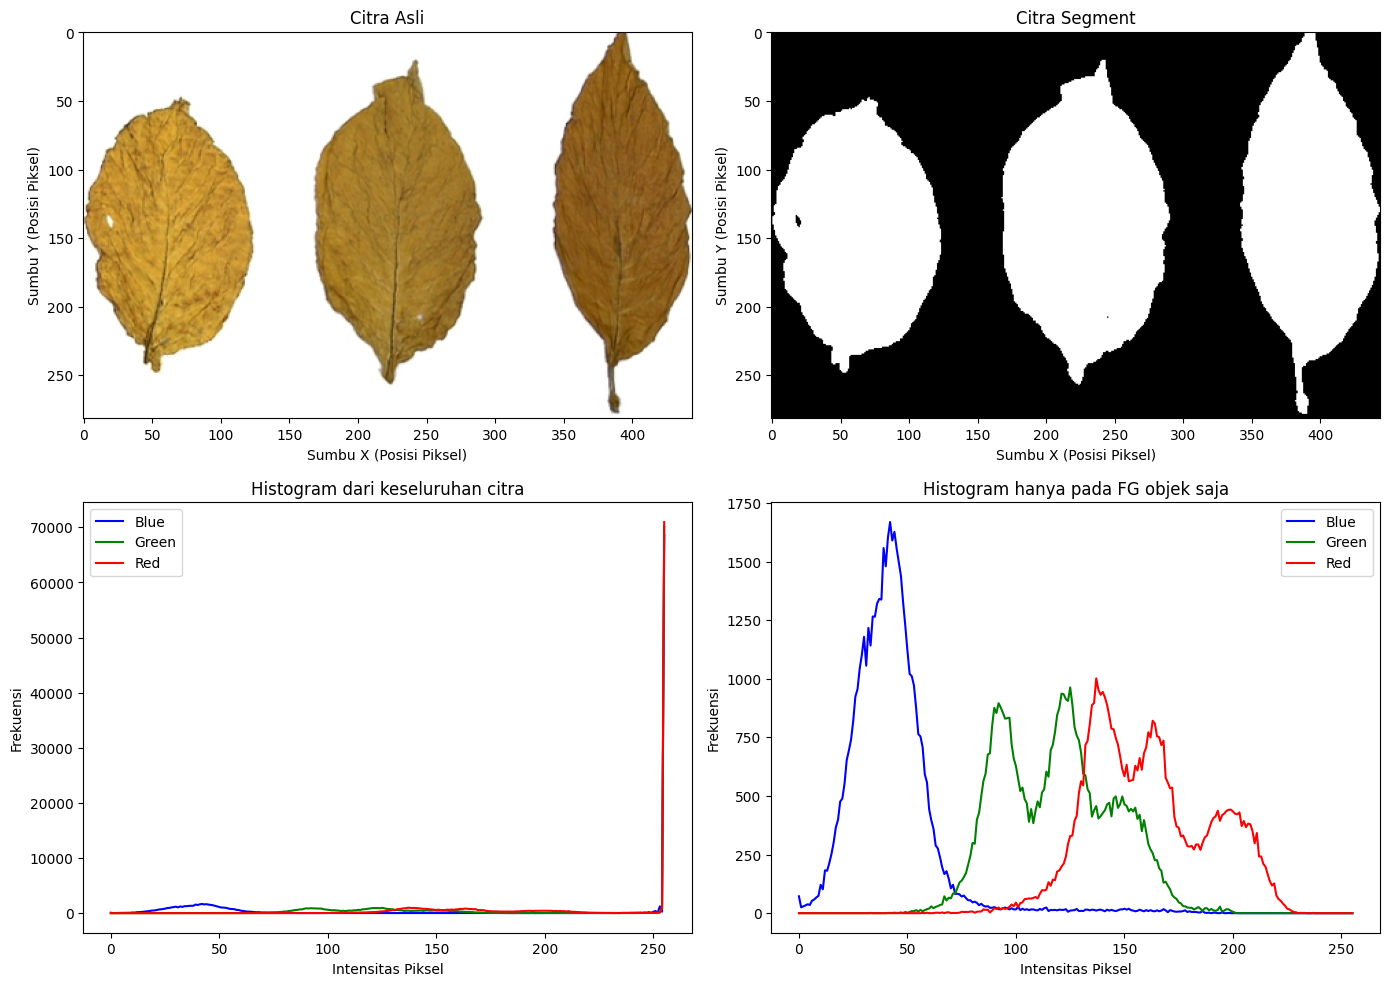

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra berwarna
filename = ('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img = cv.imread(filename)  # Membaca gambar berwarna (BGR)

# Mengonversi gambar ke format grayscale untuk membuat mask
# Mengonversi gambar ke format grayscale untuk membuat mask
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menggunakan threshold untuk segmentasi (nilai threshold dapat disesuaikan sesuai kebutuhan)
_, mask = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)

# Mask sekarang memiliki bagian daun (foreground) dalam warna putih dan latar belakang dalam warna hitam


# Menghitung histogram keseluruhan citra untuk setiap kanal (B, G, R)
hist_full_b = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_r = cv.calcHist([img], [2], None, [256], [0, 256])

# Menghitung histogram hanya untuk foreground (dengan mask) untuk setiap kanal (B, G, R)
hist_fg_b = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_fg_r = cv.calcHist([img], [2], mask, [256], [0, 256])

# Menampilkan citra asli, mask, dan histogram
plt.figure(figsize=(14, 10))

# Citra Asli (di posisi kiri atas)
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.xlabel("Sumbu X (Posisi Piksel)")
plt.ylabel("Sumbu Y (Posisi Piksel)")

# Citra Segment (Mask) (di posisi kanan atas)
plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title("Citra Segment")
plt.xlabel("Sumbu X (Posisi Piksel)")
plt.ylabel("Sumbu Y (Posisi Piksel)")

# Histogram dari keseluruhan citra (di posisi kiri bawah)
plt.subplot(2, 2, 3)
plt.plot(hist_full_b, color='b', label='Blue')
plt.plot(hist_full_g, color='g', label='Green')
plt.plot(hist_full_r, color='r', label='Red')
plt.title("Histogram dari keseluruhan citra")
plt.xlabel("Intensitas Piksel")
plt.ylabel("Frekuensi")
plt.legend()

# Histogram hanya untuk foreground (dengan mask) (di posisi kanan bawah)
plt.subplot(2, 2, 4)
plt.plot(hist_fg_b, color='b', label='Blue')
plt.plot(hist_fg_g, color='g', label='Green')
plt.plot(hist_fg_r, color='r', label='Red')
plt.title("Histogram hanya pada FG objek saja")
plt.xlabel("Intensitas Piksel")
plt.ylabel("Frekuensi")
plt.legend()

plt.tight_layout()
plt.show()


Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

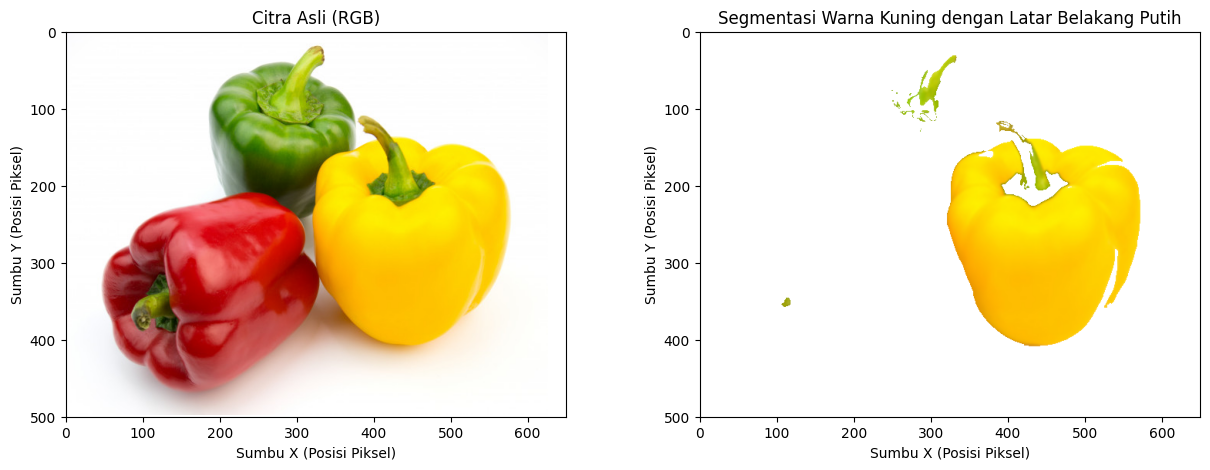

In [81]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca dan mengonversi gambar ke RGB
filename = ('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
img = cv.imread(filename)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mengaburkan gambar dengan Gaussian Blur
blur = cv.GaussianBlur(rgb_img, (5, 5), 0)

# Segmentasi warna kuning menggunakan rentang warna
lower_yellow = np.array([150, 150, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 50], dtype=np.uint8)
yellow_mask = cv.inRange(blur, lower_yellow, upper_yellow)

# Membuat gambar baru dengan latar belakang putih
yellow_segment = np.full_like(blur, 255)  # Latar belakang putih
yellow_segment[yellow_mask != 0] = blur[yellow_mask != 0]  # Menyimpan hanya warna kuning

# Membuat figure dan subplot untuk menampilkan hasil
plt.figure(figsize=(15, 5))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("Citra Asli (RGB)")
plt.xlabel("Sumbu X (Posisi Piksel)")
plt.ylabel("Sumbu Y (Posisi Piksel)")
plt.xlim([0, 650])
plt.ylim([500, 0])

# Menampilkan hasil segmentasi warna kuning dengan latar belakang putih
plt.subplot(1, 2, 2)
plt.imshow(yellow_segment)

plt.title("Segmentasi Warna Kuning dengan Latar Belakang Putih")
plt.xlabel("Sumbu X (Posisi Piksel)")
plt.ylabel("Sumbu Y (Posisi Piksel)")
plt.xlim([0, 650])
plt.ylim([500, 0])

plt.show()


Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

Global Threshold

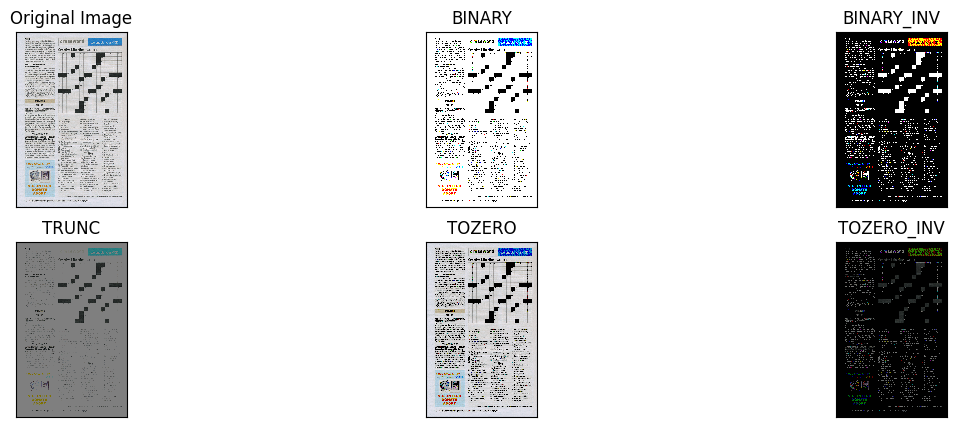

In [82]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img = cv.imread(filename)

thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Adaptive Threshold

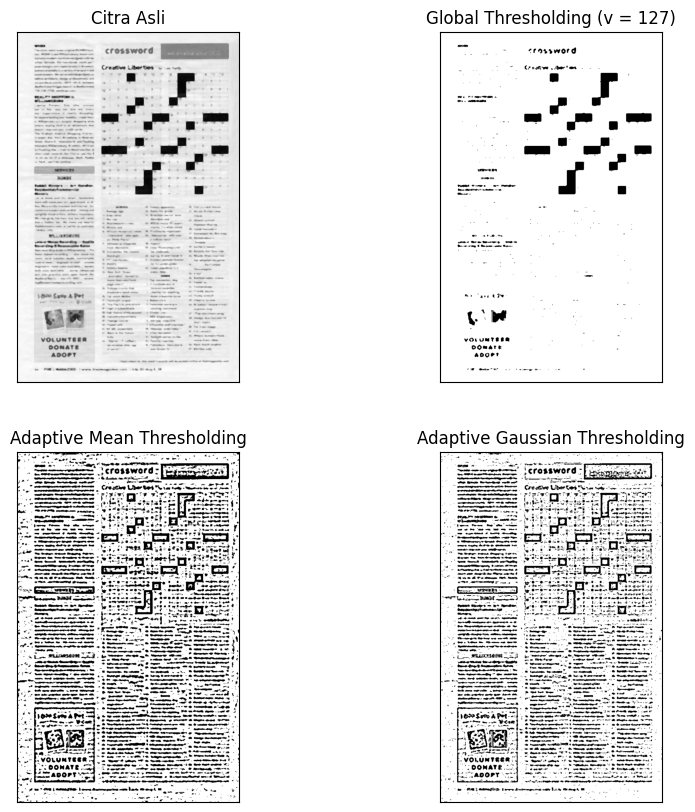

In [83]:
filename = ('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Otsu’s Threshold

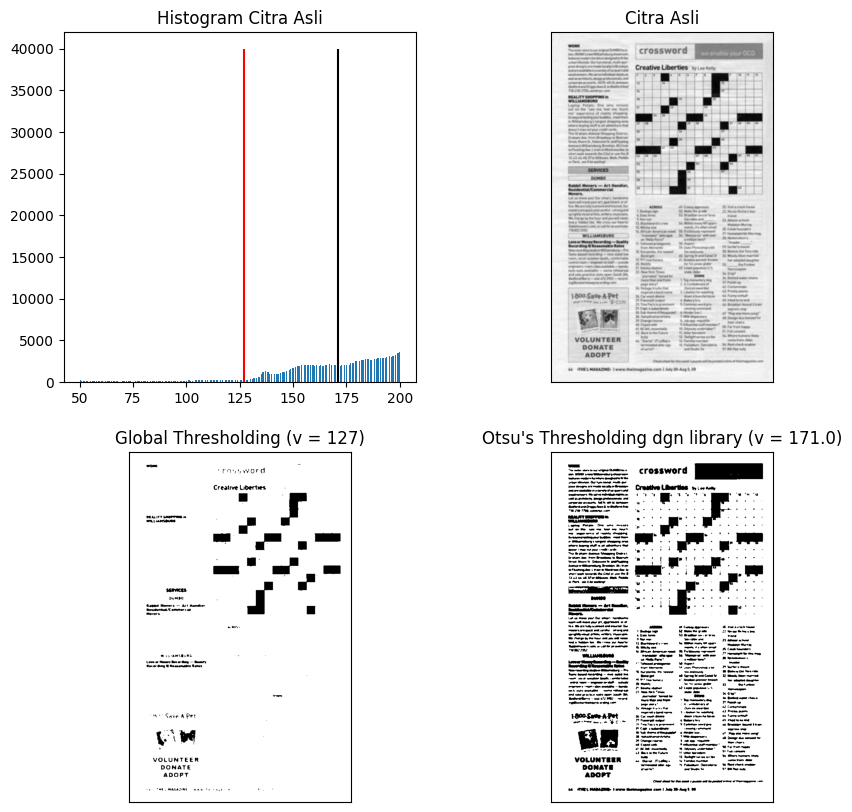

In [84]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Code berikut akan menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan
menggunakan Gaussian Filter.

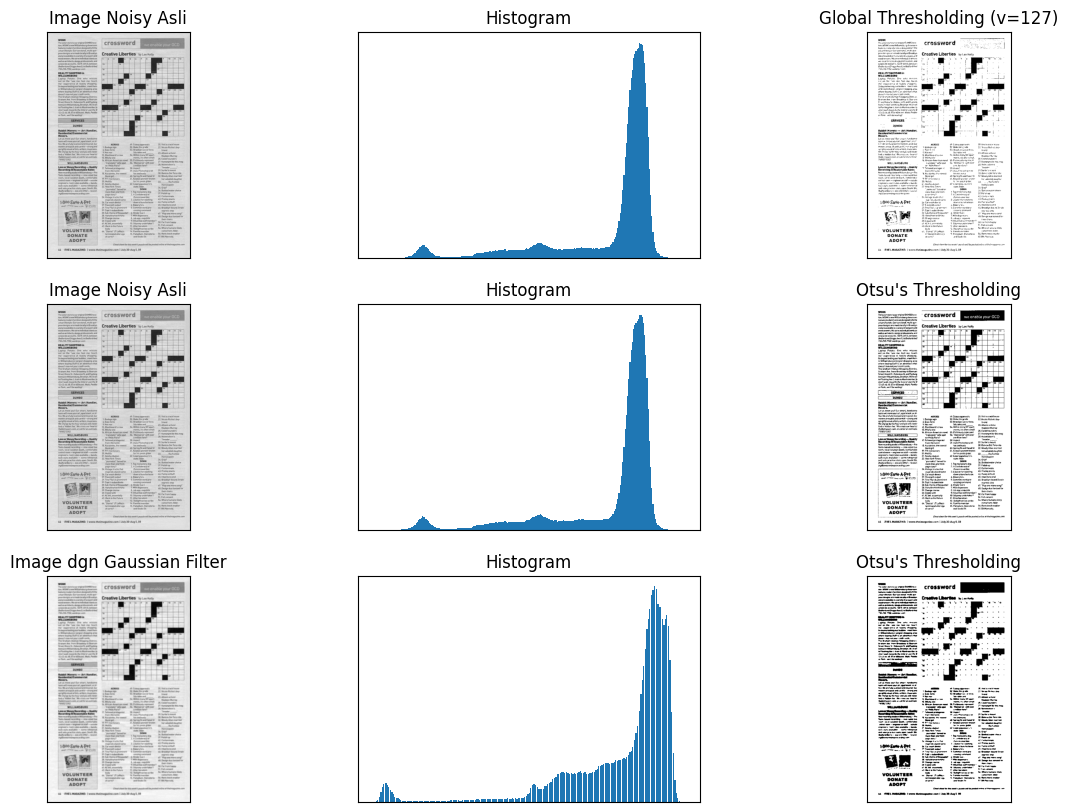

In [87]:
filename = ('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Sementasi Citra menggunakan K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x7a53e9eca5c0>)

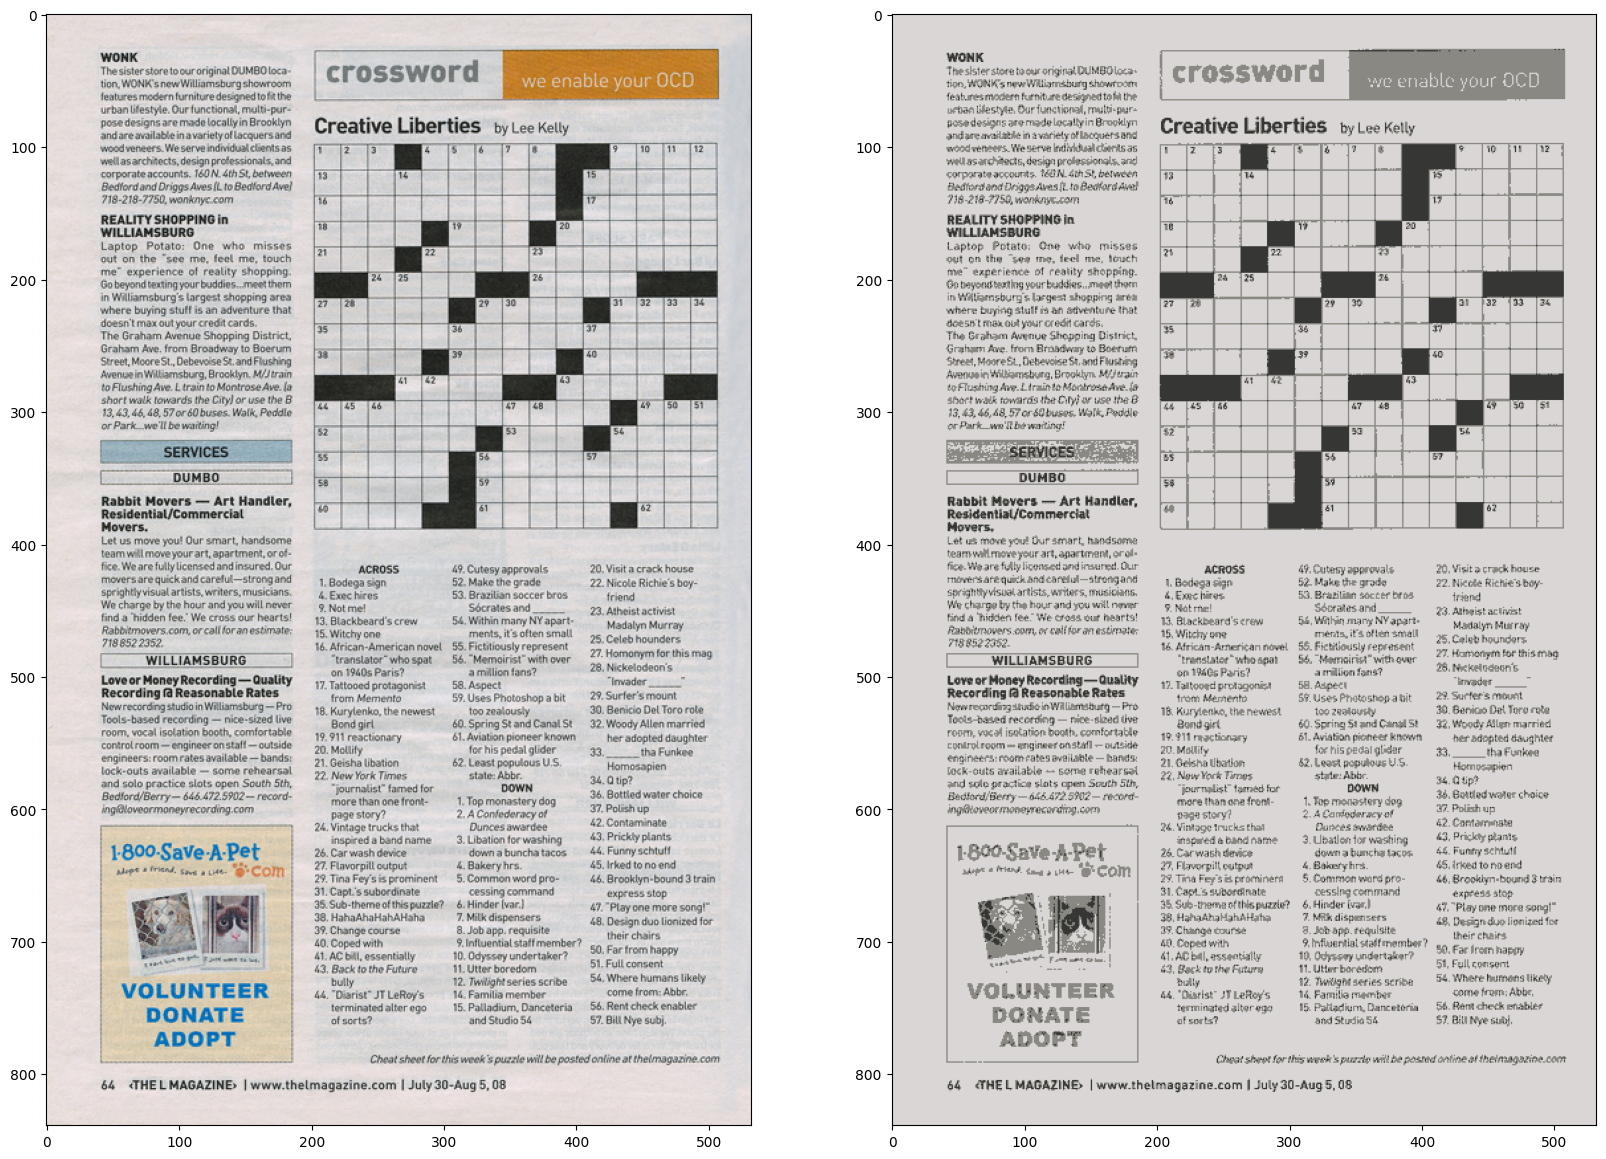

In [88]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)